In [39]:
import json
import matplotlib.pyplot as plt

# file_path = "/Users/hasan.nayir/ray_results/PPO_teastore_2023-12-18_12-18-05rpp0z76s/result.json"
# file_path = "/Users/hasan.nayir/ray_results/PPO_None_2023-11-22_13-55-55y7rntrm0/result.json"
file_path = "/Users/hasan.nayir/ray_results/PPO_teastore_2024-03-04_11-24-3056dvrf_m/result.json"
data_list = []

with open(file_path, 'r') as json_file:
    for line in json_file:
        try:
            data = json.loads(line)
            data_list.append(data)
        except json.JSONDecodeError as e:
            print(f"Error decoding JSON: {e}")


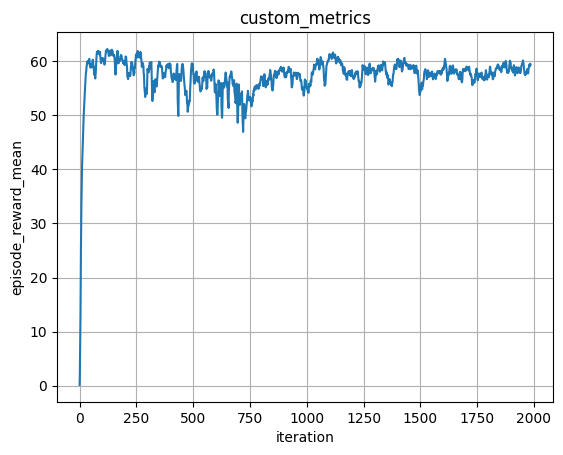

In [38]:
metric_name = "episode_reward_mean"
mode = "custom_metrics" # or custom_metrics


n_column = len(data_list[0])
n_row = len(data_list)

metric_result_list = []
for i in range(n_row):
    if mode == "evaluation":
        if mode in data_list[i]:
            temp = data_list[i]["evaluation"]["sampler_results"]["episode_reward_mean"]
            metric_result_list.append(temp)
    elif mode == "custom_metrics":
        if mode in data_list[i]:
            temp = data_list[i]["sampler_results"]["episode_reward_mean"]
            metric_result_list.append(temp)



plt.plot(metric_result_list)
plt.xlabel("iteration")
plt.ylabel(metric_name)
plt.title(mode)
plt.grid()
plt.show()

In [29]:
import pandas as pd
import numpy as np
import math
df = pd.read_csv("../data/data.csv")

ALPHA = 0.8
drop_rows = (df["cpu_usage"] != 0) | (df["memory_usage"] != 0)
hybrid_data = df[drop_rows].reset_index(drop=True)

hybrid_data["utilization"] = np.minimum(hybrid_data["cpu_usage"]/(hybrid_data["cpu"]/10),1)
"""

        performance_resp = math.tanh((20-data["response_time"]))
        performance_num = np.minimum(round(data['num_request'] /  (data['expected_tps']),6),1)
"""
for i in range(0, hybrid_data.shape[0]):
    temp = hybrid_data.iloc[i,:]
    hybrid_data.loc[i, "previous_tps"] = round(temp['previous_tps'])

    hybrid_data.loc[i, "reward"] = 0.8*np.minimum(round(temp['num_request'] /  (temp['expected_tps']),6),1)+ 0.2*temp["utilization"]

In [61]:
# Find the expected_reward_episode_mean
max_step = 100
max_reward_rows = hybrid_data.groupby("expected_tps").apply(lambda x: x.loc[x["reward"].idxmax()])
max_reward_rows.reset_index(drop=True, inplace=True)
max_reward_rows["reward"].mean()*max_step

61.300710685790214

In [34]:
prev_rows = hybrid_data[(hybrid_data["replica"] == 1) & (hybrid_data["cpu"] == 5) & (hybrid_data["previous_tps"] == 24) & (hybrid_data["expected_tps"] == 32)]
next_rows = hybrid_data[(hybrid_data["replica"] == 1) & (hybrid_data["cpu"] == 5) & (hybrid_data["previous_tps"] == 40) & (hybrid_data["expected_tps"] == 32)]

print(prev_rows.index)
print(next_rows.index)



Index([193, 1695, 3631], dtype='int64')
Index([84, 441, 823, 1145, 1929, 2405, 2641, 2939], dtype='int64')


In [35]:
hybrid_data.loc[prev_rows.index,["reward"]]

,reward
193,0.8844
1695,0.8912
3631,0.8808


In [36]:
hybrid_data.loc[next_rows.index,["reward"]]

,reward
84,0.8908
441,0.8896
823,0.9012
1145,0.9028
1929,0.9320
2405,0.8856
2641,0.8940
2939,0.8932


In [6]:
hybrid_data["expected_tps"].max()

448